In [1]:
#import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# ---- Part 2: Load Dataset ----
df = pd.read_csv("/content/blogs.csv")   # <-- Update path if needed
print(df.head())

# Check structure
print(df.info())
print(df["Labels"].value_counts())


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.bas

In [5]:
# ---- Part 3: Data Preprocessing ----
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()                      # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)    # remove links
    text = re.sub(r"[^a-z\s]", "", text)          # keep only alphabets
    tokens = nltk.word_tokenize(text)             # tokenize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["Data"].apply(clean_text)
print(df[["Data", "clean_text"]].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                          clean_text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [6]:
# ---- Part 4: Feature Extraction ----
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["Labels"]

In [7]:
# ---- Part 5: Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Accuracy: 0.84

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.78      0.70      0.74        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.56      0.75      0.64        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.90      0.95      0.93        20
         rec.motorcycles       0.90      0.90      0.90        20
      rec.sport.baseball       0.95      1.00      0.98        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.94

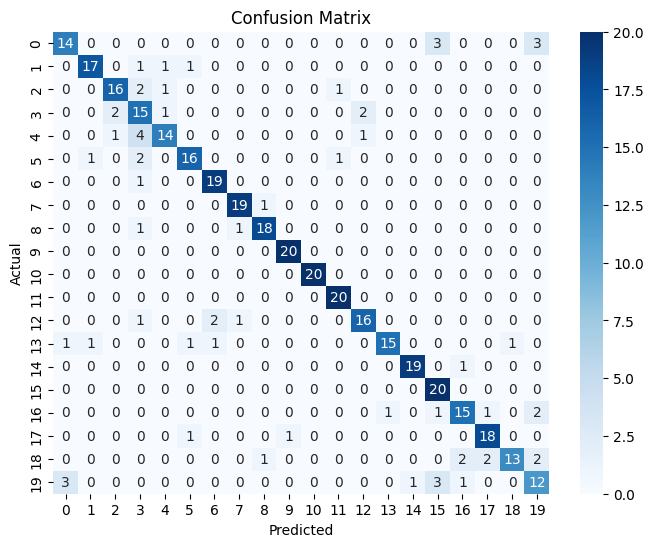

In [8]:
# ---- Part 6: Naive Bayes Classification ----
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# ---- Evaluation ----
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


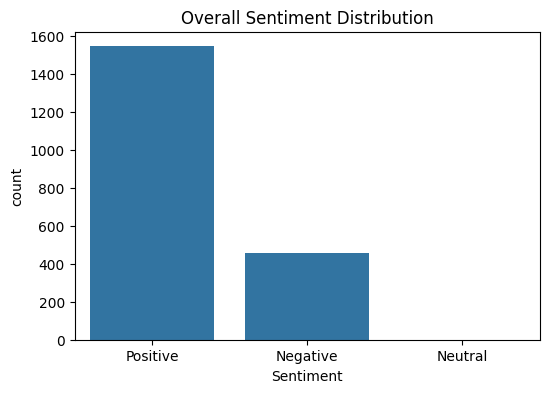

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                   23.0      77.0
comp.graphics                 24.0      76.0
comp.os.ms-windows.misc       22.0      78.0
comp.sys.ibm.pc.hardware      20.0      80.0
comp.sys.mac.hardware         24.0      76.0
comp.windows.x                27.0      73.0
misc.forsale                  16.0      84.0
rec.autos                     17.0      83.0
rec.motorcycles               26.0      74.0
rec.sport.baseball            29.0      71.0
rec.sport.hockey              34.0      66.0
sci.crypt                     19.0      81.0
sci.electronics               19.0      81.0
sci.med                       29.0      71.0
sci.space                     27.0      73.0
soc.religion.christian        13.0      87.0
talk.politics.guns            30.0      70.0
talk.politics.mideast         22.0      78.0
talk.politics.misc            22.0      78.0
talk.religion.misc            14.0      86.0


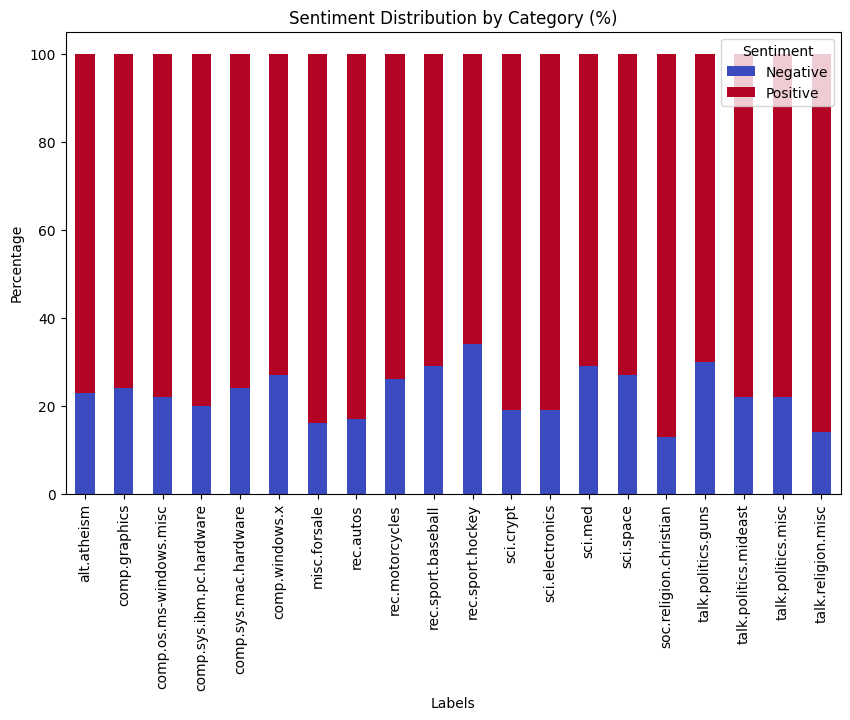

In [9]:
# ---- Part 7: Sentiment Analysis ----
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Data"].apply(get_sentiment)
print(df[["Data", "Sentiment"]].head())

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sentiment", order=["Positive", "Negative", "Neutral"])
plt.title("Overall Sentiment Distribution")
plt.show()

# Sentiment per Category
sentiment_dist = pd.crosstab(df["Labels"], df["Sentiment"], normalize="index") * 100
print(sentiment_dist)

sentiment_dist.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
plt.title("Sentiment Distribution by Category (%)")
plt.ylabel("Percentage")
plt.show()